No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


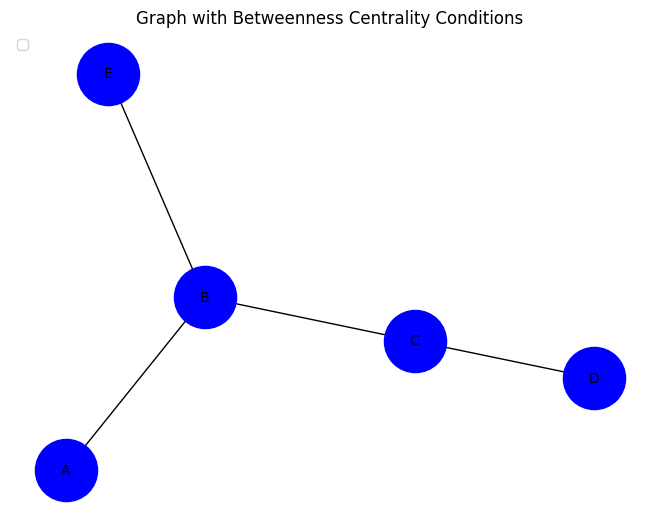

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with 5 nodes and specified edges
G = nx.Graph()
edges = [("A", "B"), ("B", "C"), ("C", "D"), ("B", "E")]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color="blue", node_size=2000, font_size=10)


# Add legend and title
plt.legend(loc="upper left")
# plt.title("Graph with Betweenness Centrality Conditions")
plt.show()


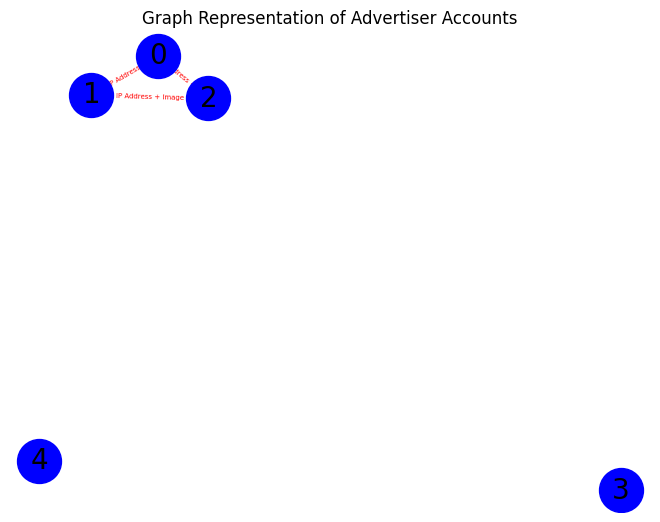

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes (advertiser accounts)
nodes = [0, 1, 2, 3, 4]
G.add_nodes_from(nodes)

# Add edges based on shared attributes (IP Address, URL, Image)
# Edges are labeled with their type for clarity
edges = [
    (0, 1, "IP Address"),
    (0, 2, "IP Address + URL"),
    (1, 2, "IP Address + Image")
]

# Add edges with labels
for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Draw the graph
pos = nx.spring_layout(G)  # Positioning for nodes
nx.draw(G, pos, with_labels=True, node_color="blue", node_size=1000, font_size=20)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=5)

# Display the graph
plt.title("Graph Representation of Advertiser Accounts")
plt.show()


In [1]:
import gzip
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

file_path = './data/facebook_combined.txt.gz'

with gzip.open(file_path, 'rt') as f:
    graph = nx.read_edgelist(f, create_using=nx.Graph(), nodetype=int)

num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 4039
Number of edges: 88234


In [2]:
degree_sequence = [d for n, d in graph.degree()]
degree_df = pd.DataFrame(degree_sequence, columns=["degree"])
print(degree_df.describe())

average_clustering = nx.average_clustering(graph)
print(f"Average clustering coefficient: {average_clustering}")

if nx.is_connected(graph):
    avg_shortest_path_length = nx.average_shortest_path_length(graph)
    print(f"Average shortest path length: {avg_shortest_path_length}")
else:
    print("Graph is not connected, can't calculate shortest path.")

            degree
count  4039.000000
mean     43.691013
std      52.420605
min       1.000000
25%      11.000000
50%      25.000000
75%      57.000000
max    1045.000000
Average clustering coefficient: 0.6055467186200876
Average shortest path length: 3.6925068496963913


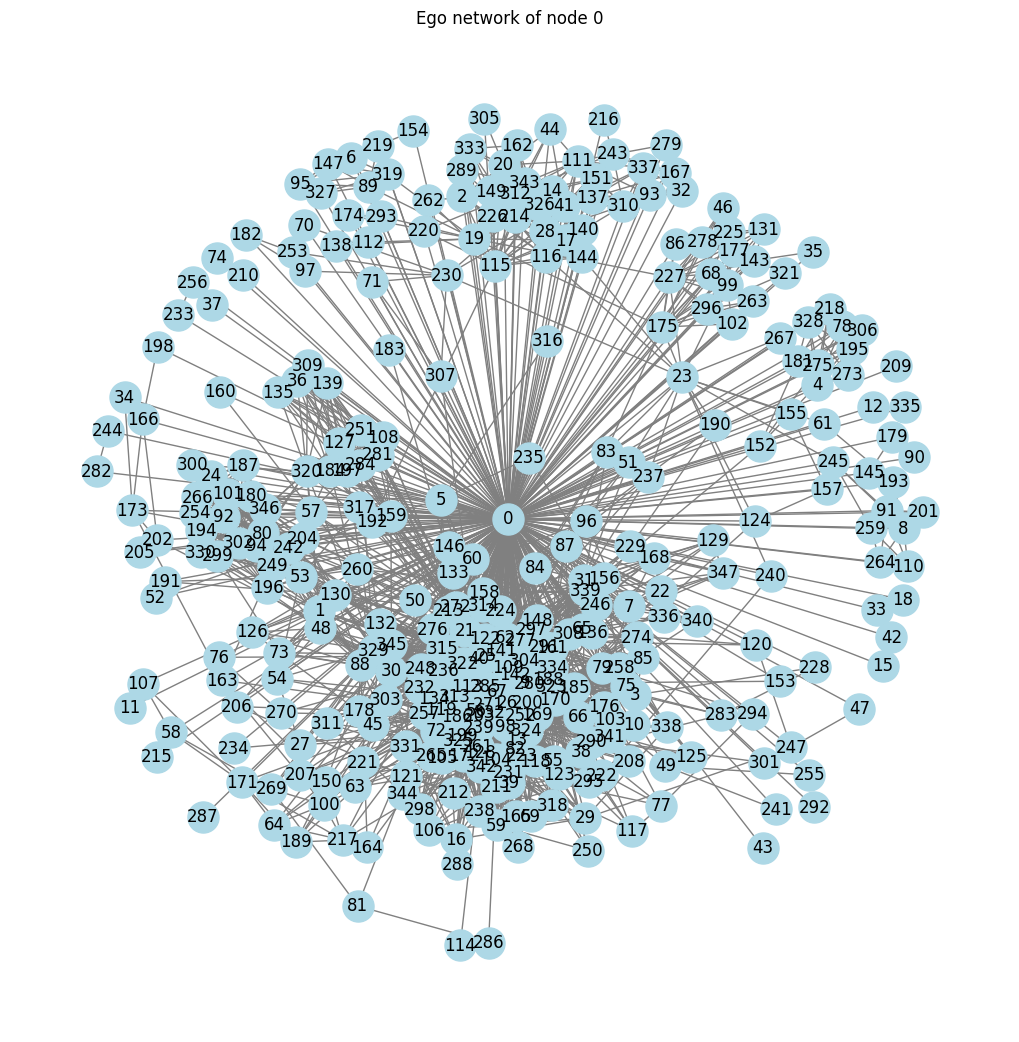

In [3]:
node = list(graph.nodes())[0]
ego_graph = nx.ego_graph(graph, node)

plt.figure(figsize=(10, 10))
nx.draw(ego_graph, with_labels=True, node_color="lightblue", node_size=500, edge_color="gray")
plt.title(f"Ego network of node {node}")
plt.show()

In [4]:
degree_centrality = nx.degree_centrality(graph)
most_important_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
print(f"Top 5 nodes by degree centrality: {most_important_nodes}")

betweenness_centrality = nx.betweenness_centrality(graph)
most_influential_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
print(f"Top 5 nodes by betweenness centrality: {most_influential_nodes}")

Top 5 nodes by degree centrality: [107, 1684, 1912, 3437, 0]
Top 5 nodes by betweenness centrality: [107, 1684, 3437, 1912, 1085]


In [5]:
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
print(f"Number of communities detected: {len(communities)}")

Number of communities detected: 13


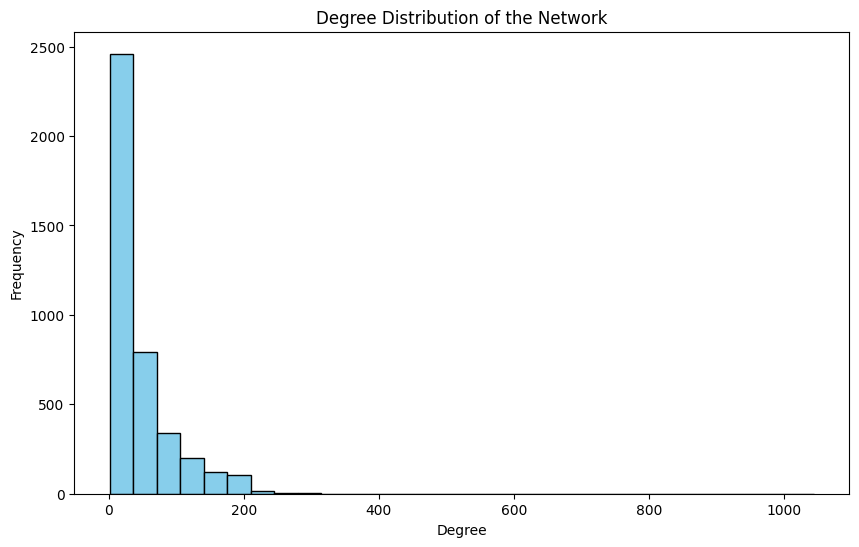

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of the Network")
plt.show()

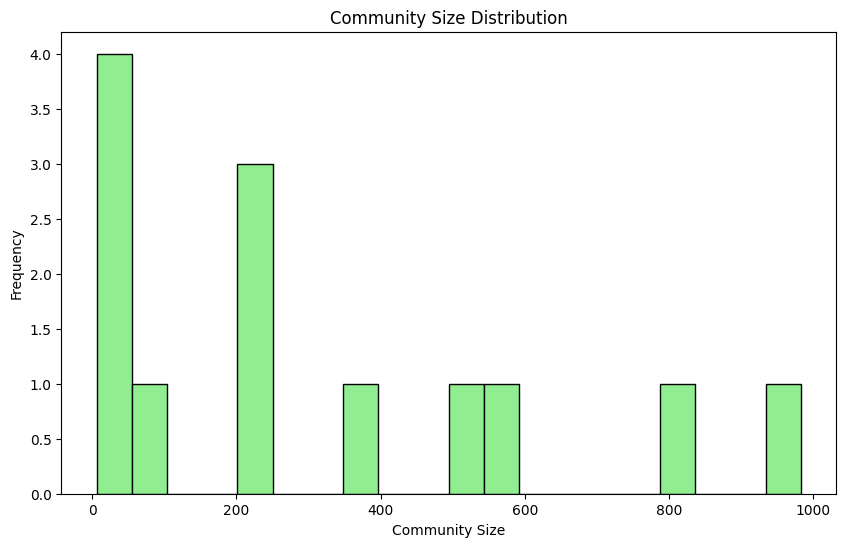

In [7]:
community_sizes = [len(c) for c in communities]
plt.figure(figsize=(10, 6))
plt.hist(community_sizes, bins=20, color="lightgreen", edgecolor="black")
plt.xlabel("Community Size")
plt.ylabel("Frequency")
plt.title("Community Size Distribution")
plt.show()

In [8]:
closeness_centrality = nx.closeness_centrality(graph)
top_closeness_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]
print(f"Top 5 nodes by closeness centrality: {top_closeness_nodes}")

eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)
top_eigenvector_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
print(f"Top 5 nodes by eigenvector centrality: {top_eigenvector_nodes}")

density = nx.density(graph)
print(f"Network Density: {density}")

Top 5 nodes by closeness centrality: [107, 58, 428, 563, 1684]
Top 5 nodes by eigenvector centrality: [1912, 2266, 2206, 2233, 2464]
Network Density: 0.010819963503439287


In [9]:
if nx.is_connected(graph):
    diameter = nx.diameter(graph)
    print(f"Diameter of the Graph: {diameter}")
else:
    print("Graph is not connected, can't calculate diameter.")

average_neighbor_degree = nx.average_neighbor_degree(graph)
avg_neighbor_degree_df = pd.DataFrame(list(average_neighbor_degree.items()), columns=["Node", "AvgNeighborDegree"])
print("Average Neighbor Degree for first 10 nodes:\n", avg_neighbor_degree_df.head(10))

Diameter of the Graph: 8
Average Neighbor Degree for first 10 nodes:
    Node  AvgNeighborDegree
0     0          18.959654
1     1          48.235294
2     2          49.900000
3     3          59.764706
4     4          42.600000
5     5          50.615385
6     6          63.500000
7     7          45.900000
8     8          48.375000
9     9          42.403509


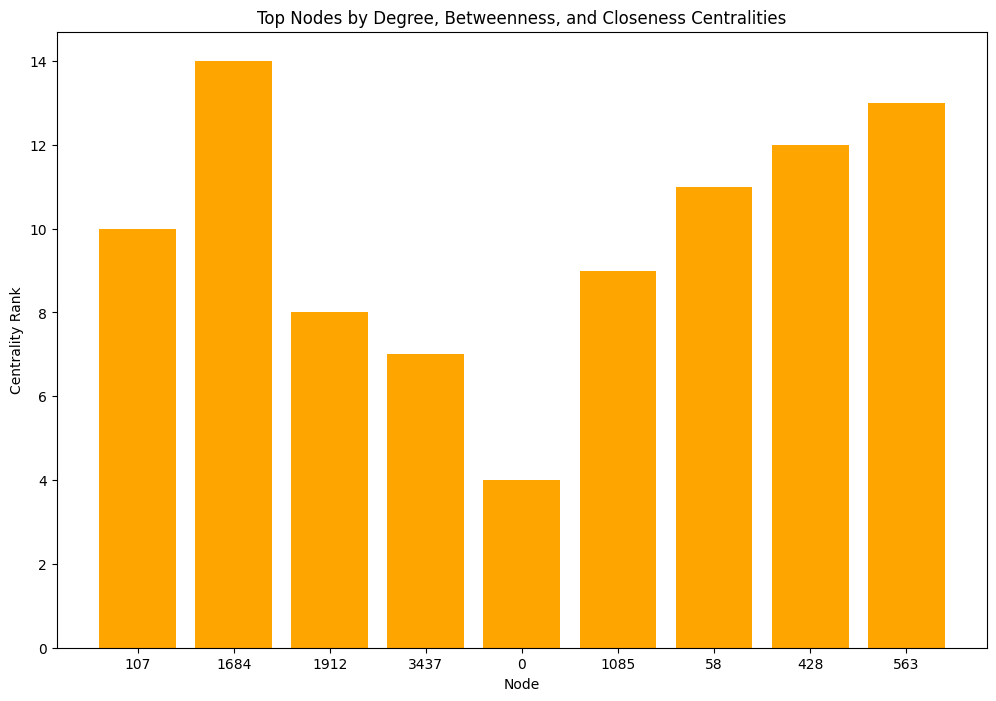

In [10]:
top_nodes_df = pd.DataFrame({
    "Node": most_important_nodes + most_influential_nodes + top_closeness_nodes,
    "Metric": ["Degree"] * len(most_important_nodes) + ["Betweenness"] * len(most_influential_nodes) + ["Closeness"] * len(top_closeness_nodes)
})
plt.figure(figsize=(12, 8))
plt.bar(top_nodes_df["Node"].astype(str), range(len(top_nodes_df["Node"])), color="orange")
plt.xlabel("Node")
plt.ylabel("Centrality Rank")
plt.title("Top Nodes by Degree, Betweenness, and Closeness Centralities")
plt.show()